## Nos enfocamos ahora en la tabla inventory_sets

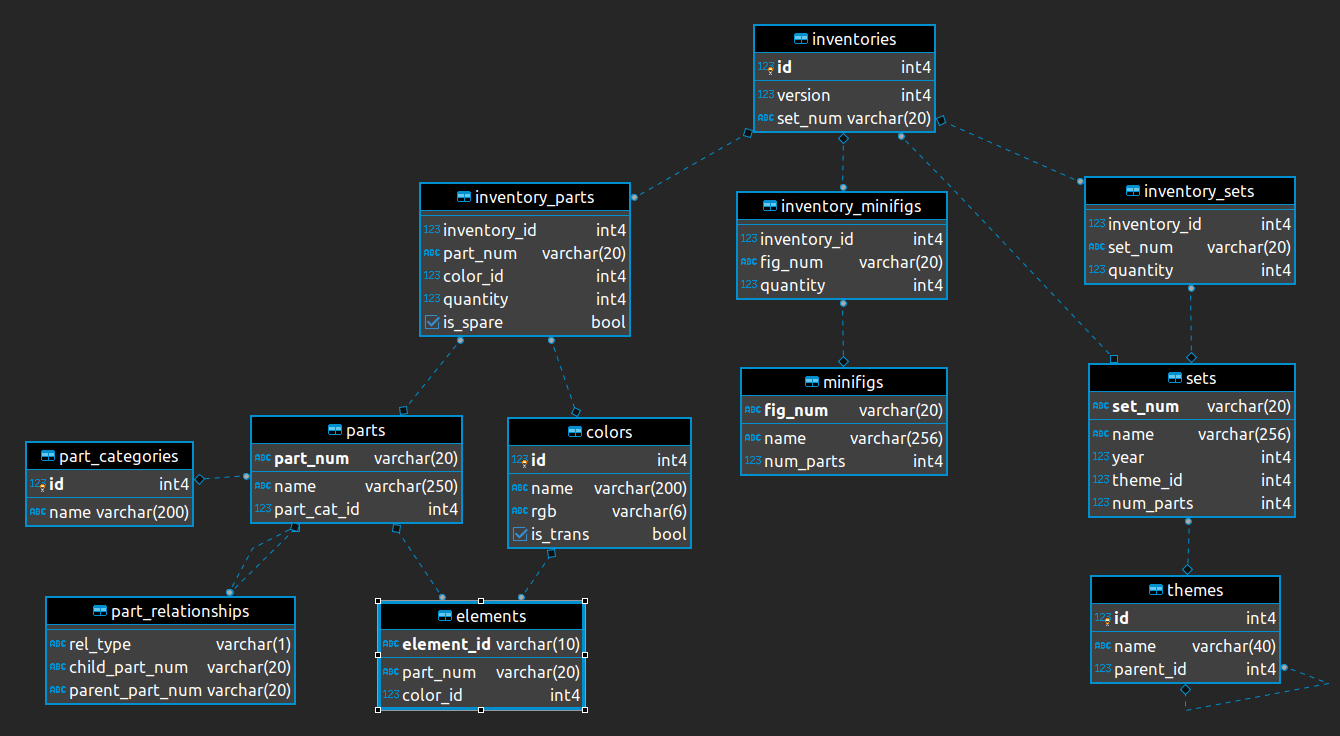

In [2]:
import pandas

In [3]:
#Recordando la tabla que ya hemos leído, tabla Sets:
sets = pandas.read_csv('MATERIALES-CAP2/02-merging-dataframes/lego-database/sets.csv.gz')

In [3]:
sets.head(2)

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12


#### Nos enfocaremos en la tabla inventory_sets

In [4]:
inventory_sets = pandas.read_csv('MATERIALES-CAP2/02-merging-dataframes/lego-database/inventory_sets.csv.gz')
inventory_sets.head()

,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


#### Importante: Siempre valida los elementos que tengas antes de realizar el merge.

### Ahora verificamos si en la tabla Set se cumple la llave primaria set_num y no hayan datos repetidos:

In [5]:
#cantidad de datos
sets.shape

(16193, 5)

In [6]:
#cantidad de valores únicos
sets['set_num'].nunique()

16193

#### Se puede notar que la cantidad de los valores de los datos coinciden, significa que no hay repeticiones

### Ahora verificamos si en la tabla Inventory_Sets se cumple la llave primaria inventory_id y no hayan datos repetidos:

In [8]:
inventory_sets['set_num'].nunique()

2278

In [9]:
inventory_sets.shape

(2994, 3)

In [10]:
inventory_sets['inventory_id'].nunique()

773

#### Significa que sí hay valores repetidos en inventory_id y en set_num de la tabla inventory_sets.

### Analizamos esos valores repetidos:

In [7]:
#Identificamos a aquellos sets que se repiten:
inventory_sets['set_num'].value_counts()  

#Hay datos que se repiten más veces:

7241-1      12
7741-1      11
3741-1      11
7942-1      11
3742-1      11
            ..
3859-1       1
1417-2       1
2192-1       1
71386-2      1
71017-14     1
Name: set_num, Length: 2278, dtype: int64

In [8]:
#Ahora realizamos una consulta sobre esos datos que tienden a repetirse:
inventory_sets.query("set_num == '7241-1' ")

,inventory_id,set_num,quantity
193,1401,7241-1,1
196,1418,7241-1,1
231,1732,7241-1,1
437,3109,7241-1,1
548,3764,7241-1,1
591,4430,7241-1,1
648,4969,7241-1,1
819,5857,7241-1,1
972,7151,7241-1,1
1632,11861,7241-1,1


#### Notamos que ese valor se repite varias veces porque se están guardando en distintos inventarios.
#### Entonces, ese dato no es útil para poder trabajarlo, nos generaría muchos problemas.

In [14]:
#sabemos que tenemos un set por cada fila
sets.head(2)

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12


In [5]:
#Realizamos un query para tener un dataset de ejemplo: SOLO SE MUESTRA UN DATO
sets_example = sets.query("set_num == '7241-1'")
sets_example

#quisiéramos una columna más que nos diga la cantidad de veces que se repite

,set_num,name,year,theme_id,num_parts
11118,7241-1,Fire Car,2005,58,47


In [6]:
#Usamos el inventory, ya que ahí hay una columna que informe sobre la cantidad de los datos, como ejemplo:
inventory_example = inventory_sets.query("set_num == '7241-1'")
inventory_example

#SE MUESTRAN VARIOS DATOS:

,inventory_id,set_num,quantity
193,1401,7241-1,1
196,1418,7241-1,1
231,1732,7241-1,1
437,3109,7241-1,1
548,3764,7241-1,1
591,4430,7241-1,1
648,4969,7241-1,1
819,5857,7241-1,1
972,7151,7241-1,1
1632,11861,7241-1,1


In [22]:
#Ahora los unimos, a través de una columna en común
pandas.merge(sets_example, inventory_example, on= 'set_num')

#al momento de combinarse hace REPETICIÓN DE LOS DATOS, no es el modo.

,set_num,name,year,theme_id,num_parts,inventory_id,quantity
0,7241-1,Fire Car,2005,58,47,1401,1
1,7241-1,Fire Car,2005,58,47,1418,1
2,7241-1,Fire Car,2005,58,47,1732,1
3,7241-1,Fire Car,2005,58,47,3109,1
4,7241-1,Fire Car,2005,58,47,3764,1
5,7241-1,Fire Car,2005,58,47,4430,1
6,7241-1,Fire Car,2005,58,47,4969,1
7,7241-1,Fire Car,2005,58,47,5857,1
8,7241-1,Fire Car,2005,58,47,7151,1
9,7241-1,Fire Car,2005,58,47,11861,1


In [23]:
# El investory_sets nos ha dicho que hay un dato igual en diferentes inventarios, esto no nos dejará trabajar:
inventory_sets.head()

,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


In [29]:
# No me interesa donde se encuentra, solo la cantidad:
#1. Nos quedamos con las dos columnas relavantes: set_num y quantity
#2. Los agrupamos por el número de sets.
#3. Sumar la cantidad de existencias que aparece en nuestra tabla
inventory_sets.get(['set_num','quantity']).groupby('set_num').sum()

,quantity
set_num,
001-1,1
10000-1,1
10001-1,1
10002-1,1
10013-1,1
...,...
k1062b,1
llca21-1,1
llca22-1,1


In [30]:
# Todo está bien, pero al parecer set_num está apareciendo en negrita como si fuera índice (no hay problema),
# Si gustas evitar eso, entonces:
inventory_sets.get(['set_num','quantity']).groupby('set_num', as_index = False).sum()

,set_num,quantity
0,001-1,1
1,10000-1,1
2,10001-1,1
3,10002-1,1
4,10013-1,1
...,...,...
2273,k1062b,1
2274,llca21-1,1
2275,llca22-1,1
2276,llca23-1,1


In [7]:
# Le asignamos a una variable:
inventory_quantity = inventory_sets.get(['set_num','quantity']).groupby('set_num', as_index = False).sum()
inventory_quantity.head()

,set_num,quantity
0,001-1,1
1,10000-1,1
2,10001-1,1
3,10002-1,1
4,10013-1,1


#### Verificamos:

In [33]:
inventory_quantity.shape

(2278, 2)

In [35]:
inventory_quantity['set_num'].nunique()

2278

#### Significa que sí hay valores únicos en esta nueva tabla.

## Ahora sí ya estamos listos para hacer el cruce entre nuestras tablas de Sets

In [38]:
#Tabla sets la cruzaremos con la tabla inventario:
sets.head(2)

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12


In [12]:
pandas.merge(sets, inventory_quantity, on= 'set_num')

,set_num,name,year,theme_id,num_parts,quantity
0,001-1,Gears,1965,1,43,1
1,10000-1,Guarded Inn,2001,199,256,1
2,10001-1,Metroliner,2001,233,787,1
3,10002-1,Railroad Club Car,2001,233,293,1
4,10013-1,Open Freight Wagon,2001,238,121,1
...,...,...,...,...,...,...
2273,QUATRO-1,Bag of Bricks,2006,441,15,1
2274,SDMYSTERYGANG-1,Scooby-Doo Surprises: Mystery Inc. Gang,2015,603,26,1
2275,WEETABIX2-1,Windmill,1976,413,126,1
2276,WEETABIX3-1,House,1976,413,149,1


#### Se verifica que quedan solo 2278 sets que son los únicos que aparecen en nuestro inventario.

### Hasta ahora hemos verificando contando la cantidad de registros y contando la cantidad de valores únicos de registros

#### Estas fueron nuestras validaciones:

In [41]:
sets.head(2)

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12


In [42]:
inventory_sets.head(2)

,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1


In [43]:
inventory_quantity.head(2)

,set_num,quantity
0,001-1,1
1,10000-1,1


#### Ahora queremos que pandas valide que las llaves que hemos hecho son únicas:

### Merge. Pandas

#### Para verificar, es últil el parámetro Validate, cruces únicas => 1:1 (tanto en sets como en inventario)

In [46]:
# Se ejecuta sin problemas, significa que son todos valores únicos:
pandas.merge(sets, inventory_quantity, on = 'set_num', validate = '1:1')

,set_num,name,year,theme_id,num_parts,quantity
0,001-1,Gears,1965,1,43,1
1,10000-1,Guarded Inn,2001,199,256,1
2,10001-1,Metroliner,2001,233,787,1
3,10002-1,Railroad Club Car,2001,233,293,1
4,10013-1,Open Freight Wagon,2001,238,121,1
...,...,...,...,...,...,...
2273,QUATRO-1,Bag of Bricks,2006,441,15,1
2274,SDMYSTERYGANG-1,Scooby-Doo Surprises: Mystery Inc. Gang,2015,603,26,1
2275,WEETABIX2-1,Windmill,1976,413,126,1
2276,WEETABIX3-1,House,1976,413,149,1


#### Supongamos que estábamos en el caso inicial, apliquemos Merge:

In [48]:
# Sale error, esto es porque en inventory hay muchos datos repetidos en distintos inventarios.
pandas.merge(sets, inventory_sets, on = 'set_num', validate= '1:1')

MergeError: Merge keys are not unique in right dataset; not a one-to-one merge

#### Supongamos que sí quiero que haya repetición en el lado derecho, entonces así:


In [8]:
#Hay llave única pero hay repetición de uno a muchos.
pandas.merge(sets, inventory_sets, on = 'set_num', validate= '1:m')

,set_num,name,year,theme_id,num_parts,inventory_id,quantity
0,001-1,Gears,1965,1,43,24732,1
1,10000-1,Guarded Inn,2001,199,256,7474,1
2,10001-1,Metroliner,2001,233,787,13941,1
3,10002-1,Railroad Club Car,2001,233,293,13941,1
4,10013-1,Open Freight Wagon,2001,238,121,13917,1
...,...,...,...,...,...,...,...
2989,QUATRO-1,Bag of Bricks,2006,441,15,31211,1
2990,SDMYSTERYGANG-1,Scooby-Doo Surprises: Mystery Inc. Gang,2015,603,26,43974,1
2991,WEETABIX2-1,Windmill,1976,413,126,3574,1
2992,WEETABIX3-1,House,1976,413,149,3574,1


## Tipos de Combinación dependiendo la Existencia de Llaves

### Left & Inner merge

In [14]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [15]:
sets.shape

(16193, 5)

In [16]:
inventory_quantity.head()

,set_num,quantity
0,001-1,1
1,10000-1,1
2,10001-1,1
3,10002-1,1
4,10013-1,1


In [18]:
inventory_quantity.shape

(2278, 2)

In [9]:
#Para saber la cantidad de sets que tenemos en existencia usamos Merge:
sets_quantity = pandas.merge(sets, inventory_quantity, on = 'set_num')
sets_quantity.head(10)

,set_num,name,year,theme_id,num_parts,quantity
0,001-1,Gears,1965,1,43,1
1,10000-1,Guarded Inn,2001,199,256,1
2,10001-1,Metroliner,2001,233,787,1
3,10002-1,Railroad Club Car,2001,233,293,1
4,10013-1,Open Freight Wagon,2001,238,121,1
5,10017-1,Hopper Wagon,2001,238,228,1
6,10020-1,Santa Fe Super Chief,2002,236,435,3
7,10022-1,"Santa Fe Cars - Set II (dining, observation, o...",2002,237,410,4
8,10024-1,Red Baron,2002,673,669,2
9,10025-1,Santa Fe Cars - Set I (mail or baggage car),2002,237,325,3


In [21]:
sets_quantity.shape

(2278, 6)

#### Notamos que hay 2278 datos que es de la misma cantidad de la table más pequeña: inventory_quantity.  Entonces la tabla más pequeña es quien controla el contenido que presenta el resultado (cantidad).

### Por defecto, Python muestra los datos en común: Inner

In [10]:
#coloco el mismo código, depsués de 'set_num': " , " Alt + Shift , signature: + : How 'Inner'
sets_quantity = pandas.merge(sets, inventory_quantity, on = 'set_num', how = 'inner'  )
sets_quantity.head(10)

#Se muestra el mismo resultado, pero ingresé el parámetro que está por defecto.

,set_num,name,year,theme_id,num_parts,quantity
0,001-1,Gears,1965,1,43,1
1,10000-1,Guarded Inn,2001,199,256,1
2,10001-1,Metroliner,2001,233,787,1
3,10002-1,Railroad Club Car,2001,233,293,1
4,10013-1,Open Freight Wagon,2001,238,121,1
5,10017-1,Hopper Wagon,2001,238,228,1
6,10020-1,Santa Fe Super Chief,2002,236,435,3
7,10022-1,"Santa Fe Cars - Set II (dining, observation, o...",2002,237,410,4
8,10024-1,Red Baron,2002,673,669,2
9,10025-1,Santa Fe Cars - Set I (mail or baggage car),2002,237,325,3


In [16]:
#si quiero que se mantengan los 16000 de la tabla sets
sets_quantity_left = pandas.merge(sets, inventory_quantity, on = 'set_num', how = 'left'  )
sets_quantity_left.head(20)

,set_num,name,year,theme_id,num_parts,quantity
0,001-1,Gears,1965,1,43,1.0
1,0011-2,Town Mini-Figures,1978,84,12,NaN
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,NaN
3,0012-1,Space Mini-Figures,1979,143,12,NaN
4,0013-1,Space Mini-Figures,1979,143,12,NaN
5,0014-1,Space Mini-Figures,1979,143,12,NaN
6,0015-1,Space Mini-Figures,1979,143,18,NaN
7,0016-1,Castle Mini Figures,1978,186,15,NaN
8,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,NaN
9,003-1,Master Mechanic Set,1966,366,403,NaN


#### Vemos que se presentan valores nulos, esto es debido a que en la tabla inventory_quantity no se encuentran estos valores

### Cambiaremos esos valores nulos por ceros.

In [17]:
#queremos rellenar la columna quantity por valores ceros:
sets_quantity_left['quantity'] = sets_quantity_left['quantity'].fillna(0)

sets_quantity_left.head(20)

,set_num,name,year,theme_id,num_parts,quantity
0,001-1,Gears,1965,1,43,1.0
1,0011-2,Town Mini-Figures,1978,84,12,0.0
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,0.0
3,0012-1,Space Mini-Figures,1979,143,12,0.0
4,0013-1,Space Mini-Figures,1979,143,12,0.0
5,0014-1,Space Mini-Figures,1979,143,12,0.0
6,0015-1,Space Mini-Figures,1979,143,18,0.0
7,0016-1,Castle Mini Figures,1978,186,15,0.0
8,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,0.0
9,003-1,Master Mechanic Set,1966,366,403,0.0
